In [1]:
# Import libraries for data handling and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load dataset provided by Member 4
df = pd.read_csv("spotify_tracks_scaled_standard.csv")

# Show first 5 rows
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_encoded
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,1.650575,0.229889,0.0,0.602300,-0.959854,...,-1.411705,3.122013,-0.848139,-0.296661,1.730636,0.737639,-1.222973,0.0,acoustic,-1.797591
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.876443,-1.211399,0.0,-1.157684,-2.332179,...,0.708363,0.783356,2.134856,-0.296388,-0.662614,-1.098408,-1.596965,0.0,acoustic,-1.797591
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.962458,-0.122893,0.0,-1.033935,-1.434353,...,0.708363,0.061072,-0.253413,-0.296721,-0.513618,-1.700861,-1.638460,0.0,acoustic,-1.797591
3,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,2.037640,-0.335790,0.0,0.203553,-1.043589,...,0.708363,-0.047621,0.612920,-0.296721,-0.831166,-1.508240,-0.074171,0.0,acoustic,-1.797591
4,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,1.005465,-0.062188,0.0,0.684799,-0.866815,...,0.708363,1.789644,0.010835,-0.296721,0.156865,0.536821,-0.860745,0.0,acoustic,-1.797591


In [3]:
# Create Tempo/Energy Ratio feature
# Add 0.0001 to avoid division by zero
df["Tempo_Energy_Ratio"] = df["tempo"] / (df["energy"] + 0.0001)

# Display first 5 rows with new feature
df[["tempo", "energy", "Tempo_Energy_Ratio"]].head()


,tempo,energy,Tempo_Energy_Ratio
0,-1.222973,-0.959854,1.274258
1,-1.596965,-2.332179,0.684782
2,-1.638460,-1.434353,1.142379
3,-0.074171,-1.043589,0.071079
4,-0.860745,-0.866815,0.993112


## Feature Engineering: Tempo/Energy Ratio
- **Tempo** = speed of a song
- **Energy** = how powerful it feels
- **Tempo/Energy Ratio** shows how fast a song is compared to its energy
- Helps identify fast-but-calm or slow-but-powerful songs


In [4]:
# Save updated CSV so next member can continue
df.to_csv("spotify_tracks_scaled_standard_updated.csv", index=False)


In [5]:
# Show basic statistics of the new feature
df["Tempo_Energy_Ratio"].describe()


count    58260.000000
mean         0.226270
std         32.969987
min      -1433.605816
25%         -0.714346
50%          0.178693
75%          1.124819
max       1211.196683
Name: Tempo_Energy_Ratio, dtype: float64

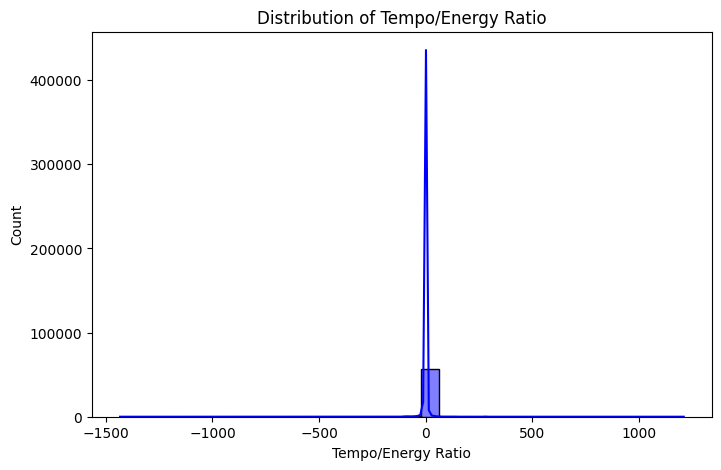

In [6]:
# Plot histogram of Tempo/Energy Ratio
plt.figure(figsize=(8,5))
sns.histplot(df["Tempo_Energy_Ratio"], bins=30, kde=True, color="blue")
plt.title("Distribution of Tempo/Energy Ratio")
plt.xlabel("Tempo/Energy Ratio")
plt.ylabel("Count")
plt.show()


The histogram shows the distribution of the Tempo/Energy Ratio.
- High ratio → fast but calm songs
- Low ratio → slow but powerful songs
- This helps the model see differences between songs better


In [7]:
# Load saved CSV and check first 5 rows
df_updated = pd.read_csv("spotify_tracks_scaled_standard_updated.csv")
df_updated.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_encoded,Tempo_Energy_Ratio
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,1.650575,0.229889,0.0,0.602300,-0.959854,...,3.122013,-0.848139,-0.296661,1.730636,0.737639,-1.222973,0.0,acoustic,-1.797591,1.274258
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.876443,-1.211399,0.0,-1.157684,-2.332179,...,0.783356,2.134856,-0.296388,-0.662614,-1.098408,-1.596965,0.0,acoustic,-1.797591,0.684782
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.962458,-0.122893,0.0,-1.033935,-1.434353,...,0.061072,-0.253413,-0.296721,-0.513618,-1.700861,-1.638460,0.0,acoustic,-1.797591,1.142379
3,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,2.037640,-0.335790,0.0,0.203553,-1.043589,...,-0.047621,0.612920,-0.296721,-0.831166,-1.508240,-0.074171,0.0,acoustic,-1.797591,0.071079
4,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,1.005465,-0.062188,0.0,0.684799,-0.866815,...,1.789644,0.010835,-0.296721,0.156865,0.536821,-0.860745,0.0,acoustic,-1.797591,0.993112
